# DATA ANALYSE

In [ ]:
import os, sys, glob, shutil, json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from debugpy.launcher.debuggee import describe
%matplotlib inline
import code.jessie_utils

In [7]:

#定义目录路径
data_dir = {
    'train_data': './tcdata/mchar_train/',
    'val_data': './tcdata/mchar_val/',
    'test_data': './tcdata/mchar_test_a/',
    'train_label': './tcdata/mchar_train.json',
    'val_label': './tcdata/mchar_val.json',
    'submit_file': './tcdata/mchar_sample_submit_A.csv'
}

## 统计train,val,test数据集的个数

In [13]:
#统计train,val,test数据集的个数
def data_summary():
  train_list = glob.glob(data_dir['train_data']+'*.png')
  test_list = glob.glob(data_dir['test_data']+'*.png')
  val_list = glob.glob(data_dir['val_data']+'*.png')
  print('train image counts: %d'%len(train_list))
  print('val image counts: %d'%len(val_list))
  print('test image counts: %d'%len(test_list))

data_summary()

train image counts: 30000
val image counts: 10000
test image counts: 40000



看train数据集第一张的信息，长宽高等

In [15]:
def look_train_json():
    with open(data_dir['train_label']) as f:
        train_json = json.load(f)


    print(train_json['000000.png'])

look_train_json()

{'height': [219, 219], 'label': [1, 9], 'left': [246, 323], 'top': [77, 81], 'width': [81, 96]}


看需要输出文件的信息

In [17]:
def look_submit():
    df = pd.read_csv(data_dir['submit_file'])
    print(df.head())

look_submit()

    file_name  file_code
0  000000.png          0
1  000001.png          0
2  000002.png          0
3  000003.png          0
4  000004.png          0


In [19]:
from code.jessie_utils import look_submit # 封装在工具包方便调用
look_submit()

    file_name  file_code
0  000000.png          0
1  000001.png          0
2  000002.png          0
3  000003.png          0
4  000004.png          0


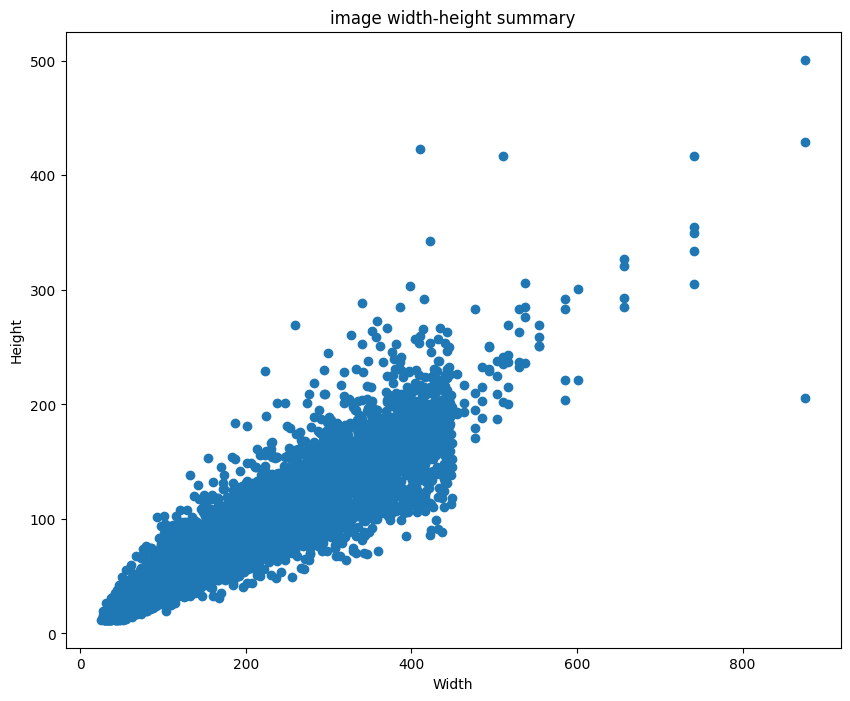

In [22]:
from PIL import Image

# 统计图片的大小
def image_size_summary():
    sizes = []
    for img in glob.glob(data_dir['train_data']+'*.png'):
        img = Image.open(img)
        sizes.append(img.size)


    sizes = np.array(sizes)
    plt.figure(figsize=(10, 8))
    plt.scatter(sizes[:, 0], sizes[:, 1])
    plt.xlabel('Width')
    plt.ylabel('Height')

    plt.title('image width-height summary')
    plt.show()

image_size_summary()

统计bbox的大小

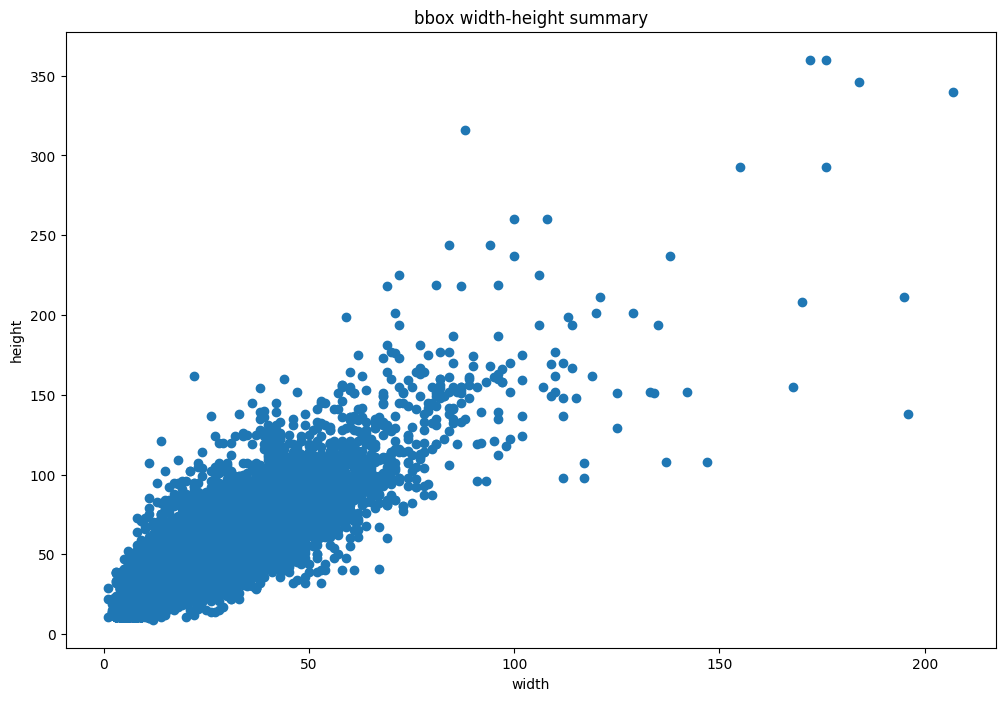

In [25]:
def bbox_summary():
    marks = json.loads(open(data_dir['train_label'], 'r').read())
    bboxes = []
    for img,mark in marks.items():
        for i in range(len(mark['label'])):
            bboxes.append([mark['left'][i], mark['top'][i], mark['width'][i], mark['height'][i]])
    bboxes = np.array(bboxes)

    fig,ax = plt.subplots(figsize=(12,8))
    ax.scatter(bboxes[:, 2], bboxes[:, 3])
    ax.set_title('bbox width-height summary')
    ax.set_xlabel('width')
    ax.set_ylabel('height')
    plt.show()

bbox_summary()

统计图片分别含有数字的个数

In [26]:
def label_summary():
    marks = json.loads(open(data_dir['train_label'], 'r').read())
    dicts={}
    for img,mark in marks.items():
        if len(mark['label']) not in dicts:
            dicts[len(mark['label'])] = 0
        dicts[len(mark['label'])] += 1

    dicts = sorted(dicts.items(), key=lambda x: x[0])
    for k,v in dicts:
        print('%d个数字的图片数目: %d' % (k, v))

label_summary()

1个数字的图片数目: 4636
2个数字的图片数目: 16262
3个数字的图片数目: 7813
4个数字的图片数目: 1280
5个数字的图片数目: 8
6个数字的图片数目: 1


In [25]:
# test
from code.jessie_utils import data_dir
from glob import glob
import json
import os
labels = json.load(open(data_dir['train_label'], 'r'))
mode = 'train'

imgs = glob(data_dir['%s_data' % mode]+'*.png')

labels[os.path.split(imgs[15])[-1]]

{'height': [19, 19],
 'label': [2, 3],
 'left': [20, 26],
 'top': [3, 1],
 'width': [7, 7]}

In [22]:
from PIL import Image

img = Image.open(imgs[32])
img.size


(91, 44)

In [23]:
min_size = 128 if (img.size[1] / 128) < (img.size[0] / 256) else 256
min_size

128